In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score


In [4]:
abt=pd.read_csv('analytical_base_table')
X=abt.drop('status',axis=1)
y=abt.status
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234,stratify=abt.status)
print(len(X_train),len(X_test),len(y_train),len(y_test))


11254 2814 11254 2814


In [5]:
pipelines={
    'l1':make_pipeline(StandardScaler(),LogisticRegression(penalty='l1',random_state=123)),
    'l2':make_pipeline(StandardScaler(),LogisticRegression(penalty='l2',random_state=123)),
    'rf':make_pipeline(StandardScaler(),RandomForestClassifier(random_state=123)),
    'gb':make_pipeline(StandardScaler(),GradientBoostingClassifier(random_state=123))
}

In [6]:
l1_hyperparameters={
    'logisticregression__C':[0.001,0.005,0.01,0.05,0.1,0.5,1,5,10,50,100,500,1000]
}
l2_hyperparameters={
    'logisticregression__C':[0.001,0.005,0.01,0.05,0.1,0.5,1,5,10,50,100,500,1000]
}
rf_hyperparameters={
    'randomforestclassifier__n_estimators':[100,200],
    'randomforestclassifier__max_features':['auto','sqrt',0.33],
    'randomforestclassifier__min_samples_leaf':[1,3,5,10]
}
gb_hyperparameters={
    'gradientboostingclassifier__n_estimators':[100,200],
    'gradientboostingclassifier__learning_rate':[0.05,0.1,0.2],
    'gradientboostingclassifier__max_depth':[1,3,5]
}
hyperparameters={
    'l1':l1_hyperparameters,
    'l2':l2_hyperparameters,
    'rf':rf_hyperparameters,
    'gb':gb_hyperparameters
}


In [8]:
fitted_models={}
for name,pipeline in pipelines.items():
    model=GridSearchCV(pipeline,hyperparameters[name],cv=10,n_jobs=-1)
    model.fit(X_train,y_train)
    fitted_models[name]=model
    print(name,' model has fitted')

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


l1  model has fitted


C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


l2  model has fitted


C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


rf  model has fitted


C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


gb  model has fitted


In [9]:
for name,model in fitted_models.items():
    print(name,model.best_score_)


l1 0.8493868846632309
l2 0.8493868846632309
rf 0.979651679402879
gb 0.9752088146436823


In [19]:
pred=fitted_models['l1'].predict(X_test)

print(pred[:10])

print(confusion_matrix(y_test,pred))

[0 0 0 0 0 0 0 1 1 0]
[[1969  172]
 [ 220  453]]


C:\Users\User\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [11]:
pred=fitted_models['l1'].predict_proba(X_test)
pred=[p[1] for p in pred]
print(np.round(pred[:10],2))


C:\Users\User\Anaconda3\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[0.03 0.   0.01 0.09 0.07 0.48 0.13 0.62 0.73 0.14]


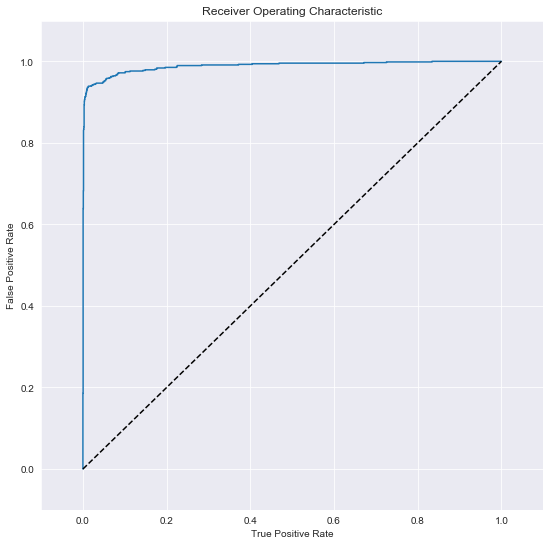

In [18]:
fpr,tpr,thresholds=roc_curve(y_test,pred)

fig=plt.figure(figsize=(9,9))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,label='l1')
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.show()



In [14]:
print(roc_auc_score(y_test,pred))


0.9015430014581236


In [15]:
for name,model in fitted_models.items():
    pred=model.predict_proba(X_test)
    pred=[p[1] for p in pred]
    print(name,roc_auc_score(y_test,pred))


l1 0.9015430014581236
l2 0.9015367553315895
rf 0.9915194952019338
gb 0.9886802836851869


C:\Users\User\Anaconda3\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [20]:
import pickle
with open('final_model1_cat.pkl','wb') as f:
    pickle.dump(fitted_models['rf'].best_estimator_,f)

In [21]:
with open('final_model1_cat.pkl','rb') as f:
    clf = pickle.load(f)

In [22]:
clf

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.33, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_i...tors=100, n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False))])

In [23]:
abt = pd.read_csv('analytical_base_table')

In [24]:
abt.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,status,tenure,last_evaluation_missing,underperformer,...,department_finance,department_management,department_marketing,department_procurement,department_product,department_sales,department_support,salary_high,salary_low,salary_medium
0,221,0.0,0.932868,4,0.0,0.829896,1,5.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,232,0.0,0.000000,3,0.0,0.834544,0,2.0,1,0,...,0,0,0,0,0,0,1,0,1,0
2,184,0.0,0.788830,3,0.0,0.834988,0,3.0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,206,0.0,0.575688,4,0.0,0.424764,0,2.0,0,1,...,0,0,0,0,0,1,0,0,1,0
4,249,0.0,0.845217,3,0.0,0.779043,0,3.0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [25]:
y = abt.status
X  = abt.drop('status',axis =1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state =1234,stratify =abt.status)

In [26]:
pred =clf.predict_proba(X_test)
pred = [p[1] for p in pred]
print('AUROC:',roc_auc_score(y_test,pred))

AUROC: 0.9915194952019338


C:\Users\User\Anaconda3\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [28]:
raw_data =pd.read_csv('unseen_raw_data.csv')

In [29]:
raw_data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure
0,228,management,NaN,0.735618,2,NaN,high,0.805661,3.0
1,229,product,NaN,1.000000,4,NaN,low,0.719961,4.0
2,196,sales,1.0,0.557426,4,NaN,low,0.749835,2.0
3,207,IT,NaN,0.715171,3,NaN,high,0.987447,3.0
4,129,management,NaN,0.484818,2,NaN,low,0.441219,3.0


In [31]:
def clean_data(df):
    df = df.drop_duplicates()
    df = df[df.department != 'temp']
    df['filed_complaint']  = df.filed_complaint.fillna(0)
    df['recently_promoted'] = df.recently_promoted.fillna(0)
    df.department.replace('information_technology','IT',inplace=True)
    df['department'].fillna('Missing',inplace =True)
    df['last_evaluation_missing'] =  df.last_evaluation.isnull().astype(int)
    df.last_evaluation.fillna(0,inplace =True)
    return df

In [33]:
cleaned_data = clean_data(raw_data)

In [35]:
cleaned_data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,last_evaluation_missing
0,228,management,0.0,0.735618,2,0.0,high,0.805661,3.0,0
1,229,product,0.0,1.000000,4,0.0,low,0.719961,4.0,0
2,196,sales,1.0,0.557426,4,0.0,low,0.749835,2.0,0
3,207,IT,0.0,0.715171,3,0.0,high,0.987447,3.0,0
4,129,management,0.0,0.484818,2,0.0,low,0.441219,3.0,0


In [37]:
def engineer_features(df):
    df['underformer'] = ((df.last_evaluation <0.6) & (df.last_evaluation_missing==0)).astype(int)
    df['unhappy'] = (df.satisfaction<0.2).astype(int)
    df['overachiever'] = ((df.last_evaluation>0.8)&(df.satisfaction>0.7)).astype(int)
    
    df = pd.get_dummies(df,columns =['department','salary'])
    return df

In [39]:
cleaned_data_FE = engineer_features(cleaned_data)

In [40]:
cleaned_data_FE.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,last_evaluation_missing,underformer,unhappy,...,department_finance,department_management,department_marketing,department_procurement,department_product,department_sales,department_support,salary_high,salary_low,salary_medium
0,228,0.0,0.735618,2,0.0,0.805661,3.0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,229,0.0,1.000000,4,0.0,0.719961,4.0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,196,1.0,0.557426,4,0.0,0.749835,2.0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,207,0.0,0.715171,3,0.0,0.987447,3.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,129,0.0,0.484818,2,0.0,0.441219,3.0,0,1,0,...,0,1,0,0,0,0,0,0,1,0


In [41]:
augmented_data = cleaned_data_FE

In [42]:
augmented_data.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,last_evaluation_missing,underformer,unhappy,...,department_finance,department_management,department_marketing,department_procurement,department_product,department_sales,department_support,salary_high,salary_low,salary_medium
0,228,0.0,0.735618,2,0.0,0.805661,3.0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,229,0.0,1.000000,4,0.0,0.719961,4.0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,196,1.0,0.557426,4,0.0,0.749835,2.0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,207,0.0,0.715171,3,0.0,0.987447,3.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,129,0.0,0.484818,2,0.0,0.441219,3.0,0,1,0,...,0,1,0,0,0,0,0,0,1,0


In [44]:
pred =clf.predict_proba(augmented_data)
print(pred[:5])

[[1.   0.  ]
 [0.98 0.02]
 [1.   0.  ]
 [1.   0.  ]
 [0.   1.  ]]


C:\Users\User\Anaconda3\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [75]:
class EmployeeRetentionModel:
    def __init__(self,model_location):
        with open(model_location,'rb') as f:
            self.model = pickle.load(f)
    
    def predict_proba(self,X_new,clean =True,augment =True):
        if clean:
            X_new = self.clean_data(X_new)
            
        if augment:
            X_new = self.engineer_features(X_new)
        
        return X_new,self.model.predict_proba(X_new)

    def clean_data(self,df):
        
        df = df.drop_duplicates()
        df = df[df.department != 'temp']
        df['filed_complaint']  = df.filed_complaint.fillna(0)
        df['recently_promoted'] = df.recently_promoted.fillna(0)
        df.department.replace('information_technology','IT',inplace=True)
        df['department'].fillna('Missing',inplace =True)
        df['last_evaluation_missing'] =  df.last_evaluation.isnull().astype(int)
        df.last_evaluation.fillna(0,inplace =True)
        return df
    def engineer_features(self,df):
        df['underformer'] = ((df.last_evaluation <0.6) & (df.last_evaluation_missing==0)).astype(int)
        df['unhappy'] = (df.satisfaction<0.2).astype(int)
        df['overachiever'] = ((df.last_evaluation>0.8)&(df.satisfaction>0.7)).astype(int)
    
        df = pd.get_dummies(df,columns =['department','salary'])
        return df
            
    
    
            

In [76]:
retention_model = EmployeeRetentionModel('final_model1_cat.pkl')

In [77]:
_, pred1 = retention_model.predict_proba(raw_data,clean =True,augment =True)
_, pred2 = retention_model.predict_proba(cleaned_data,clean =False,augment = True)
_, pred3 = retention_model.predict_proba(augmented_data,clean =False,augment =False)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [82]:
np.array_equal(pred1,pred2) and np.array_equal(pred2,pred3)

True